In [1]:
pip install geopandas


                                              0.0/1.1 MB ? eta -:--:--
     -                                        0.0/1.1 MB ? eta -:--:--
     -                                        0.0/1.1 MB ? eta -:--:--
     ----                                     0.1/1.1 MB 901.1 kB/s eta 0:00:02
     -------                                  0.2/1.1 MB 1.2 MB/s eta 0:00:01
     ----------                               0.3/1.1 MB 1.4 MB/s eta 0:00:01
     -----------------                        0.5/1.1 MB 1.9 MB/s eta 0:00:01
     -------------------------                0.7/1.1 MB 2.3 MB/s eta 0:00:01
     -----------------------------            0.8/1.1 MB 2.4 MB/s eta 0:00:01
     --------------------------------         0.9/1.1 MB 2.6 MB/s eta 0:00:01
     -----------------------------------      1.0/1.1 MB 2.3 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 2.3 MB/s eta 0:00:00
                                              0.0/22.9 MB ? eta -:--:--
          

In [3]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [4]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [5]:
#Las dimensiones 
countries.shape

(252, 2)

Part I

Complete all the exercises in Python, but prepare the visual in R.
Publish the Python code (as html or colab), and publish the visuals in R.

PART I

- Ejercicio 1: 
Commit and push the recently created geopackage.

Get the link from Github to read the geopackage into R.

Using the sf library in R, confirm the layers created (use st_layers), and open each map (read_sf). Draw the three layers (as we did in Python) using ggplot.

- Ejercicio 2:

Follow the same steps in this last section, but use Peru.
Plot your three layers in R.
- Ejercicio 3:
- Ejercicio 4:


### Ejercicio 1: 

Despues de haber creado el archivo GPKG y subirlo a Github se ha obtenido el enlace del archivo que nos ayudará a visualizar en mapa en R

https://github.com/Richmaninoff/introgeodf/blob/main/maps/worldMap.gpkg

A continuación vamos  R para generar los gráficos 

In [ ]:
#RPUB: 

### Ejercicio 2:

- Follow the same steps in this last section, but use Peru.
- Plot your three layers in R.

In [2]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
#countries es el DF, de hecho es el archivo que posees

In [6]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [7]:
peru=countries[countries.COUNTRY=='Peru']

But you can also subset by clipping, as sometimes other data frames may not have the same fields for filtering:



In [8]:
citiesperu_clipped = gpd.clip(gdf=cities,
                          mask=peru)
riversperu_clipped = gpd.clip(gdf=rivers,
                               mask=peru)

<Axes: >

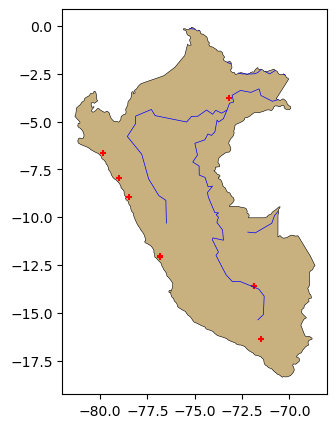

In [14]:
#plot the clipped version:

base = peru.plot(facecolor="#C8B17F", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesperu_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversperu_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [11]:
peru.geom_type


172    Polygon
dtype: object

In [12]:
citiesperu_clipped.geom_type


269    Point
339    Point
529    Point
317    Point
423    Point
260    Point
476    Point
422    Point
dtype: object

In [13]:
riversperu_clipped.geom_type


59         LineString
1     MultiLineString
60    MultiLineString
85         LineString
65         LineString
dtype: object

In [ ]:
Part II
Similar to Part I, do the CHALLENGE, using Python for coding, and R for plotting.
Challenge: 